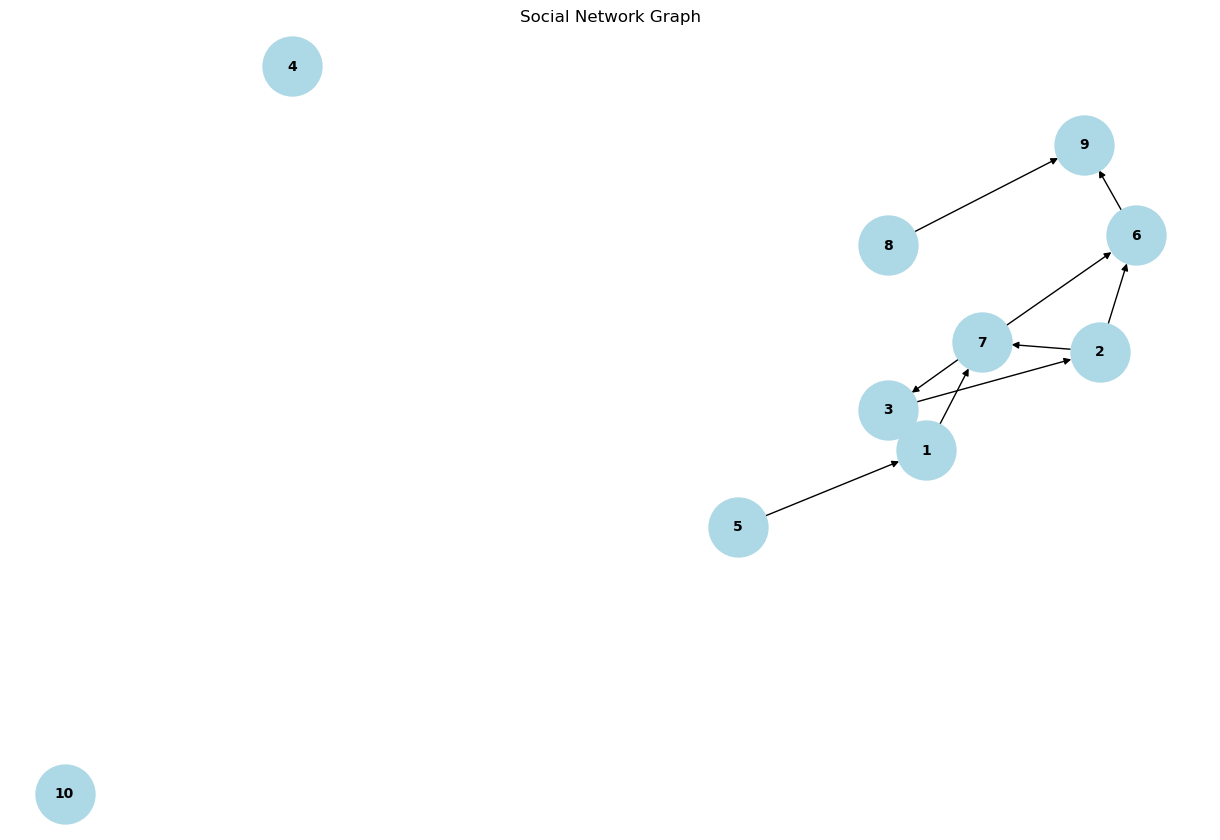

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
from networkx.algorithms import community

# Load the nodes and edges from CSV files
nodes_df = pd.read_csv("C:\\Users\\Lalit\\OneDrive\\Desktop\\CODES\\BIG DATA\\node.csv")
edges_df = pd.read_csv("C:\\Users\\Lalit\\OneDrive\\Desktop\\CODES\\BIG DATA\\edge.csv")

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_df.iterrows():
    G.add_node(row['Node ID'], name=row['Name'], age=row['Age'], gender=row['Gender'], occupation=row['Occupation'])

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1800, font_size=10, font_color='black', font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network Graph')
plt.show()


,Node ID,Name,Degree Centrality,Betweenness Centrality,Closeness Centrality,PageRank
0,1,Virat,0.333333,0.069444,0.111111,0.072622
1,2,Rohit,0.333333,0.041667,0.222222,0.146713
2,3,Sachin,0.333333,0.041667,0.296296,0.126420
3,4,Raina,0.000000,0.000000,0.000000,0.039255
4,5,Yuvraj,0.111111,0.000000,0.000000,0.039255
5,6,Yusuf,0.333333,0.069444,0.308642,0.157908
6,7,Dhoni,0.444444,0.069444,0.296296,0.132471
7,8,Jadega,0.111111,0.000000,0.000000,0.039255
8,9,Bumrah,0.222222,0.000000,0.340278,0.206845
9,10,Siraj,0.000000,0.000000,0.000000,0.039255




Community 1: [1, 2, 3, 5, 6, 7]


Community 2: [4]


Community 3: [8, 9]


Community 4: [10]


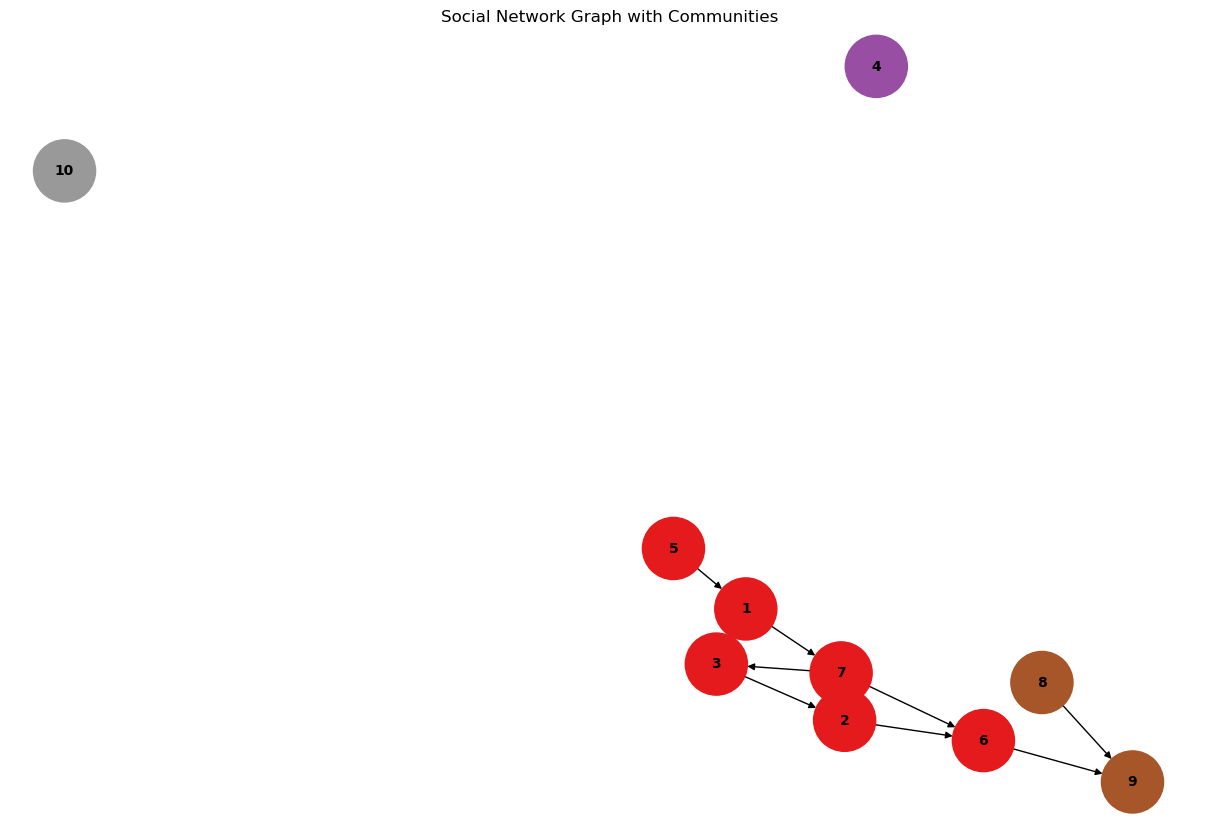

In [5]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

# Create DataFrames for centrality measures
degree_df = pd.DataFrame(degree_centrality.items(), columns=['Node ID', 'Degree Centrality'])
betweenness_df = pd.DataFrame(betweenness_centrality.items(), columns=['Node ID', 'Betweenness Centrality'])
closeness_df = pd.DataFrame(closeness_centrality.items(), columns=['Node ID', 'Closeness Centrality'])
pagerank_df = pd.DataFrame(pagerank.items(), columns=['Node ID', 'PageRank'])

# Merge DataFrames with node names
centrality_df = nodes_df[['Node ID', 'Name']].merge(degree_df, on='Node ID').merge(betweenness_df, on='Node ID').merge(closeness_df, on='Node ID').merge(pagerank_df, on='Node ID')

# Display the final DataFrame
display(centrality_df)

# Find clusters using Girvan-Newman algorithm
comp = community.girvan_newman(G)
# Get the first set of communities
first_community = next(comp)

# Print communities
for i, community in enumerate(first_community):
    print(f"\n\nCommunity {i + 1}: {list(community)}")

# Visualization of the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Color nodes based on community
community_colors = {}
for idx, community in enumerate(first_community):
    for node in community:
        community_colors[node] = idx

# Draw nodes with colors
node_colors = [community_colors[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set1, node_size=2000, font_size=10, font_color='black', font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network Graph with Communities')
plt.show()